In [1]:
import pandas as pd
import spacy
import scispacy
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# **Load and Filter Data**

In [36]:
# Load MIMIC-III dataset files
noteevents_df = pd.read_csv("data/NOTEEVENTS.csv")
diagnoses_icd_df = pd.read_csv("data/DIAGNOSES_ICD.csv")

# Ensure column names are consistent
diagnoses_icd_df.columns = diagnoses_icd_df.columns.str.upper()

# Filter ICD-9 Code '5715' (Liver disease)
filtered_df = diagnoses_icd_df[diagnoses_icd_df["ICD9_CODE"] == "5715"]

# Extract SUBJECT_IDs & HADM_IDs
arr_subject_id = filtered_df["SUBJECT_ID"].tolist()
arr_hadm_id = filtered_df["HADM_ID"].tolist()

# Print summary
print(f"✅ Found {len(arr_subject_id)} records for ICD-9 Code '5715'.")
print("📌 SUBJECT_IDs:", arr_subject_id[:10])  # Show first 10 IDs

# **Optimized Filtering using .isin() instead of loops**
filtered_notes_df = noteevents_df[noteevents_df["SUBJECT_ID"].isin(arr_subject_id)][["SUBJECT_ID", "CATEGORY", "TEXT"]]

# Display filtered data
print(filtered_notes_df.head())

# Save filter note to a csv
filtered_notes_df.to_csv('liver_notes.csv', index= False)

/var/folders/29/8ncbdz4n013f2p__f12f36qr0000gn/T/ipykernel_71784/3558525759.py:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  noteevents_df = pd.read_csv("data/NOTEEVENTS.csv")


✅ Found 1287 records for ICD-9 Code '5715'.
📌 SUBJECT_IDs: [117, 78, 4, 246, 188, 188, 188, 188, 143, 480]
     SUBJECT_ID           CATEGORY  \
111        5458  Discharge summary   
120       68109  Discharge summary   
285       23637  Discharge summary   
286       23637  Discharge summary   
287       23637  Discharge summary   

                                                  TEXT  
111  Admission Date:  [**2137-3-7**]              D...  
120  Admission Date:  [**2189-9-7**]              D...  
285  Admission Date:  [**2194-7-24**]     Discharge...  
286  Admission Date:  [**2195-6-17**]       Dischar...  
287  Admission Date:  [**2195-6-17**]       Dischar...  


# **Spacy**

In [57]:
import spacy
import pandas as pd

df = pd.read_csv("liver_notes.csv")[:5] # reduce to 5 for performance

nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents], doc

# Process and extract entities
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    
    if entities:  # Only display if there are entities
        print(f"Idx: {idx} Entities Found: {len(entities)}")
        for entity, label in entities:
            print(f"Entity: {entity}, Label: {label}")
        print('*' * 100)

Idx: 0 Entities Found: 276
Entity: Admission Date:  , Label: ORG
Entity: 2137-3-7, Label: DATE
Entity: 2137-3-16, Label: DATE
Entity: 2060-10-8, Label: DATE
Entity: Name3 (LF, Label: ORG
Entity: 348, Label: CARDINAL
Entity: 76, Label: DATE
Entity: 1-31, Label: CARDINAL
Entity: NASH, Label: ORG
Entity: PSC, Label: ORG
Entity: Grade II, Label: PRODUCT
Entity: PSC, Label: ORG
Entity: CAD, Label: ORG
Entity: 1.8, Label: CARDINAL
Entity: 4.8, Label: CARDINAL
Entity: 5.8, Label: CARDINAL
Entity: 1-31, Label: CARDINAL
Entity: 3.5L, Label: CARDINAL
Entity: SBP, Label: GPE
Entity: the past several weeks, Label: DATE
Entity: NSAIDS, Label: ORG
Entity: 1, Label: CARDINAL
Entity: 2, Label: CARDINAL
Entity: 2, Label: CARDINAL
Entity: 2, Label: CARDINAL
Entity: Grade 2, Label: PRODUCT
Entity: 3, Label: CARDINAL
Entity: Cholangiocarcinoma, Label: ORG
Entity: 4, Label: CARDINAL
Entity: 5, Label: CARDINAL
Entity: 6, Label: CARDINAL
Entity: 8), Label: CARDINAL
Entity: MIB, Label: ORG
Entity: 1-3, Label:

In [ ]:
from spacy import displacy

for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    
    if entities:  # Only display if there are entities
        displacy.render(doc, style="ent", jupyter=True)
        print('*' * 100)

# Scispacy

In [67]:
import scispacy
import pandas as pd
import en_core_sci_lg

df = pd.read_csv("liver_notes.csv")[:5] # only use the 5 for performance
nlp = en_core_sci_lg.load()

# Function to extract named entities using SciSpaCy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents], doc

# Process and extract entities
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    
    if entities:  # Only display if there are entities
        print(f"Idx: {idx} Entities Found: {len(entities)}")
        for entity, label in entities:
            print(f"Entity: {entity}, Label: {label}")
        print('*' * 100)

/Users/jesusminjares/Desktop/UT Austin MSAI/Courses/ AI395T AI in Healthcare/ai_healthcare/lib/python3.12/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_lg' (0.5.4) was trained with spaCy v3.7.4 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Idx: 0 Entities Found: 663
Entity: Admission, Label: ENTITY
Entity: Date, Label: ENTITY
Entity: Birth, Label: ENTITY
Entity: Sex, Label: ENTITY
Entity: Lisinopril, Label: ENTITY
Entity: Name3, Label: ENTITY
Entity: LF, Label: ENTITY
Entity: Acute renal failure, Label: ENTITY
Entity: Surgical, Label: ENTITY
Entity: Invasive Procedure, Label: ENTITY
Entity: yo, Label: ENTITY
Entity: male, Label: ENTITY
Entity: chronic kidney disease, Label: ENTITY
Entity: cirrhosis, Label: ENTITY
Entity: NASH, Label: ENTITY
Entity: PSC, Label: ENTITY
Entity: ascites, Label: ENTITY
Entity: Grade II esophageal, Label: ENTITY
Entity: varices, Label: ENTITY
Entity: DM2, Label: ENTITY
Entity: PSC, Label: ENTITY
Entity: CAD, Label: ENTITY
Entity: acute worsening, Label: ENTITY
Entity: creatinine, Label: ENTITY
Entity: Patient, Label: ENTITY
Entity: chronic kidney disease, Label: ENTITY
Entity: baseline, Label: ENTITY
Entity: creatinine, Label: ENTITY
Entity: elevated, Label: ENTITY
Entity: potassium, Label: EN

In [ ]:
# Process and extract entities
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    
    if entities:  # Only display if there are entities
        displacy.render(doc, style="ent", jupyter=True)
        print('*' * 100)


# Scispacy with en_ner_bc5cdr_md model

In [69]:
import en_ner_bc5cdr_md
import pandas as pd

df = pd.read_csv("liver_notes.csv")[:5] # only use the 5 for performance
nlp = en_ner_bc5cdr_md.load()
# Process and extract entities
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    
    if entities:  # Only display if there are entities
        displacy.render(doc, style="ent", jupyter=True)
        print('*' * 100)

/Users/jesusminjares/Desktop/UT Austin MSAI/Courses/ AI395T AI in Healthcare/ai_healthcare/lib/python3.12/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.4) was trained with spaCy v3.7.4 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


# **Word2Vec**

## Word2Vec Spacy

In [64]:
import pandas as pd
import spacy
import scispacy
import en_core_sci_lg
from spacy import displacy
from gensim.models import Word2Vec

# Load dataset
df = pd.read_csv("liver_notes.csv")[:100] # set to 100

# Load spacy NLP model
nlp = spacy.load("en_core_web_sm")  # Using standard SpaCy model

# Function to extract named entities using SciSpaCy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents], doc

sentences = []
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    sentences.append([token.text for token in doc if not token.is_stop and not token.is_punct])

# Train Word2Vec model on extracted text
w2v_model_spacy = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


In [65]:
# Print word vector and similar words in a formatted output
word = 'Furosemide'
if word in w2v_model_spacy.wv:
    print(w2v_model_spacy.wv.similar_by_word(word))
else:
    print(f"Word '{word}' not found in vocabulary.")

[('HS', 0.996829628944397), ('Solution', 0.9954865574836731), ('HCl', 0.9953999519348145), ('Divalproex', 0.9949305653572083), ('QHS', 0.9942290782928467), ('Plavix', 0.9941669702529907), ('b.i.d', 0.9940879940986633), ('QAM', 0.9938725829124451), ('Nadolol', 0.9936785697937012), ('Capsule', 0.9936450719833374)]


##  Word2Vec Scispacy

In [70]:
import pandas as pd
import spacy
import scispacy
import en_core_sci_lg
from spacy import displacy
from gensim.models import Word2Vec

# Load dataset
df = pd.read_csv("liver_notes.csv")[:100] # set to 100

# Load SciSpaCy NLP model
nlp = en_core_sci_lg.load()  # Using larger SciSpaCy model for better medical term recognition

# Function to extract named entities using SciSpaCy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents], doc

sentences = []
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    sentences.append([token.text for token in doc if not token.is_stop and not token.is_punct])

# Train Word2Vec model on extracted text
w2v_model_scispacy = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


/Users/jesusminjares/Desktop/UT Austin MSAI/Courses/ AI395T AI in Healthcare/ai_healthcare/lib/python3.12/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_lg' (0.5.4) was trained with spaCy v3.7.4 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [71]:
# Print word vector and similar words in a formatted output
word = 'Furosemide'
if word in w2v_model_scispacy.wv:
    print(w2v_model_scispacy.wv.similar_by_word(word))
else:
    print(f"Word '{word}' not found in vocabulary.")

[('500', 0.9979904294013977), ('Lasix', 0.9978922009468079), ('po', 0.9975515007972717), ('bedtime', 0.9974295496940613), ('q.', 0.9973838329315186), ('q', 0.9973596930503845), ('mg', 0.9972935914993286), ('p.o', 0.9971017837524414), ('QID', 0.997079074382782), ('Aldactone', 0.996779203414917)]


## **tSNE Plots**

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

## Spacy tSNE plot

/Users/jesusminjares/Desktop/UT Austin MSAI/Courses/ AI395T AI in Healthcare/ai_healthcare/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


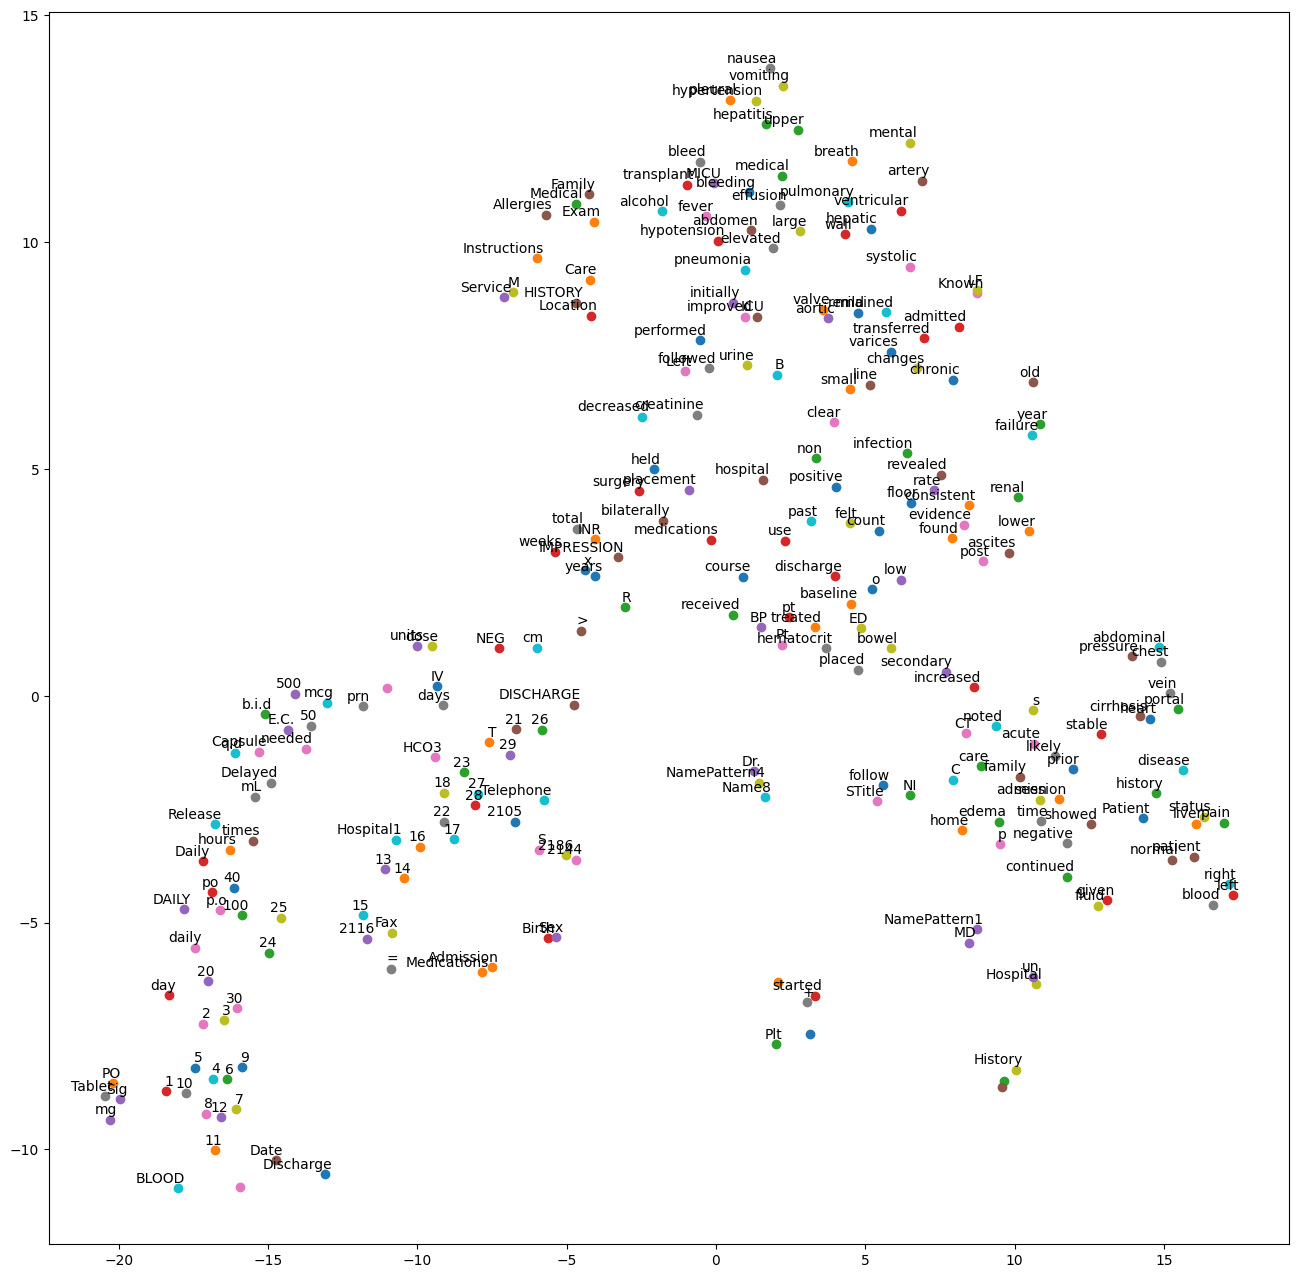

In [ ]:
vocabs = list(w2v_model_spacy.wv.index_to_key)[:250]  # Limit to 250 words for clarity
new_v = np.array(vocabs)
tsne_plot(w2v_model_spacy,new_v)

## Scispacy tSNE plot

/Users/jesusminjares/Desktop/UT Austin MSAI/Courses/ AI395T AI in Healthcare/ai_healthcare/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


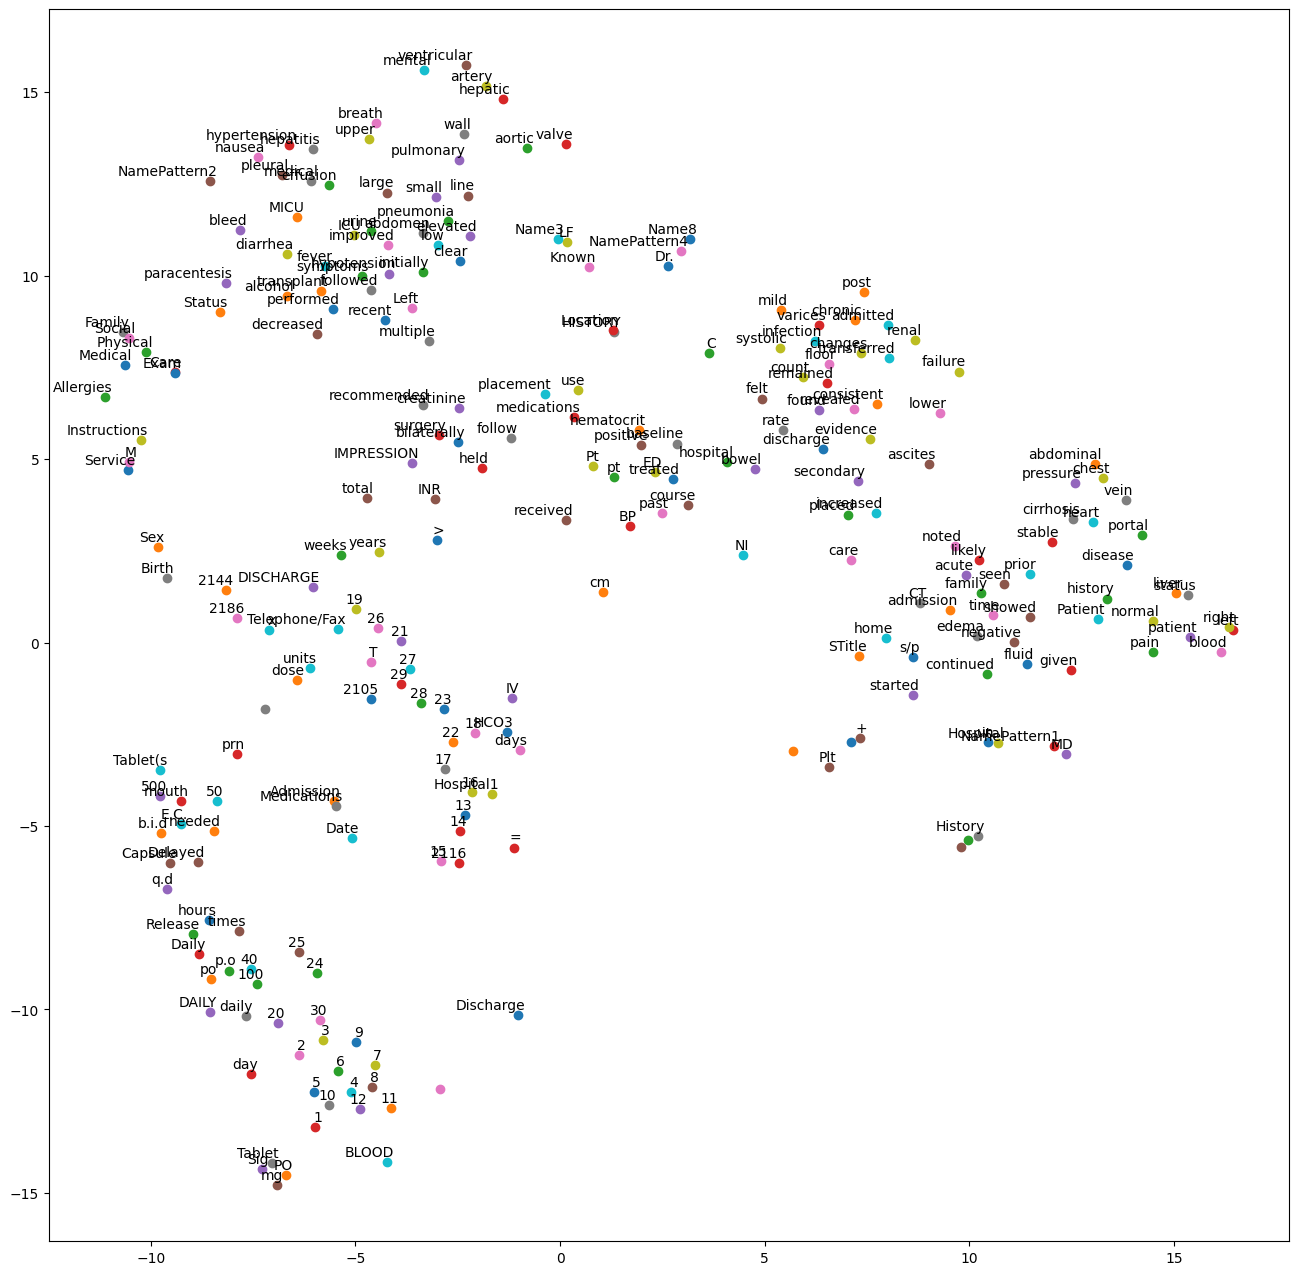

In [ ]:
vocabs = list(w2v_model_scispacy.wv.index_to_key)[:250]  # Limit to 250 words for clarity
new_v = np.array(vocabs)
tsne_plot(w2v_model_scispacy,new_v)